# PRIMER PROYECTO INDIVIDUAL - HENRY

Este proyecto consiste en la realización de un trabajo completo de machine learning, desde la limpieza y analisis de los datos hasta la implentación de un modelo de sistema de recomendación. En esta primera parte se realizará el ETL (Extract, trasnformation and Load) y EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from dateutil.parser import parse
import datetime
import re

In [2]:
#Lectura de los datasets 
credits = pd.read_csv("../PI_MLOps/Datasets/credits.csv")
movies = pd.read_csv("../PI_MLOps/Datasets/movies_dataset.csv")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5732\695435783.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("../PI_MLOps/Datasets/movies_dataset.csv")


In [3]:

pd.set_option('display.max_columns', 30)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### TRANSFORMACIONES
 las proximas celdas contienen las diferentes transformaciones necesarias para la limpieza de dos datasets, como eliminación de columnas, eliminación de datos nulos y duplicados, cambios en los tipos de datos, transformacion de columnas anidadas y creacion de nuevas columnas a partir de datos específicos sustraidos de filas con grandes cantidades de datos. 

    Eliminacion de Columnas innecesarias para el proyecto

In [5]:

movies = movies.drop(["video","imdb_id","adult","original_title","poster_path" , "homepage"], axis=1)

    Observación para la transformación de los datasets: Dimensión, datos nulos e información general. 

In [6]:
#Dimension
movies.shape

(45466, 18)

In [7]:
#Valores nulos
movies.isna().sum()

belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64

En el siguiente grafico observamos que la columna belongs_to_Collection (la cual será utilizada mas adelante), contiene generalmente valores nulos, por lo que se reemplazará con el string "sin dato", en lugar de su eliminación.

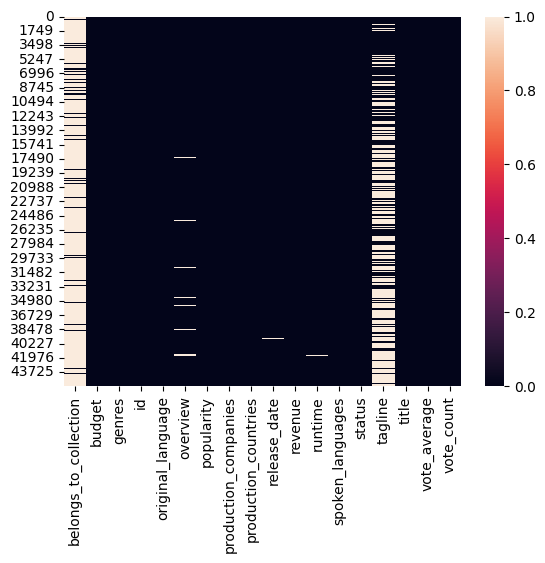

In [8]:
sns.heatmap (movies.isnull()) 
plt.show()

In [9]:
#Información general del datasets movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 45466 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   production_companies   45463 non-null  object 
 8   production_countries   45463 non-null  object 
 9   release_date           45379 non-null  object 
 10  revenue                45460 non-null  float64
 11  runtime                45203 non-null  float64
 12  spoken_languages       45460 non-null  object 
 13  status                 45379 non-null  object 
 14  tagline                20412 non-null  object 
 15  ti

In [10]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [11]:
credits.shape

(45476, 3)

In [12]:

credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [13]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


      Transformaciones: Eliminación de duplicados, eliminación de valores nulos, reemplazo de valores nulos, cambio de tipo de datos y creación de nuevas columnas.

In [14]:
#Ver si hay valores duplicados
duplicados =  movies.duplicated()
duplicados.sum()

13

In [15]:
#Eliminar duplicados
movies = movies.drop_duplicates()
movies.shape

(45453, 18)

In [16]:
#Eliminar valores nulos
movies = movies.dropna(subset=["release_date"])
movies = movies.dropna(subset=["production_companies"])
movies = movies.dropna(subset=["production_countries"])

In [17]:
#Reemplazar los valores nulos de la columna belongs_to_collection 
movies["belongs_to_collection"] = movies["belongs_to_collection"].fillna("sin dato")

In [18]:
#Reemplazar los valores nulos de la columna revenue 
movies["revenue"] = movies["revenue"].fillna(0)

In [19]:
#Cambiar al tipo de dato numerico para poder eliminar datos nulos
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

In [20]:
#Reemplazar los valores nulos de la columna budget 
movies["budget"] = movies["budget"].fillna(0)

In [21]:
#crear una nueva columna para retorno de inversion 
movies["return"] = movies["revenue"] / movies["budget"]

In [22]:
#Reemplazar con nulos los datos infinitos
movies["return"] = movies["return"].replace([np.inf, -np.inf], np.nan)

In [23]:
#Reemplazar los valores nulos de la columna return 
movies["return"] = movies["return"].fillna(0)

In [24]:
#Cambiar a tipo fecha
movies["release_date"] = movies["release_date"].apply(lambda x: parse(x))

In [25]:
movies["release_date"]

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45460   1991-05-13
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45366, dtype: datetime64[ns]

In [26]:
#Extraer el año en una nueva columna
movies["año"] = movies['release_date'].dt.year 

In [27]:
#Funcion para covertir a hora la columna runtime
def convertir_a_hora(numero_entero):
    horas, minutos = divmod(numero_entero, 60)
    hora_formateada = f"{horas} hrs {minutos} mins"
    return hora_formateada

In [28]:
#cambiar el tipo de dato a entero y aplicar funcion para pasarlo a formato hora
movies["runtime"] = movies["runtime"].astype("Int64", errors='raise')

movies['runtime'] = movies['runtime'].apply(convertir_a_hora)

In [29]:
#Funcion para desanidar las columnas
def desempaquetar(value):
    try:
        columna = ast.literal_eval(value)  
        if isinstance(columna, dict): 
            return columna.get('name', '')
        if isinstance(columna, list): 
            names = [dic.get('name', '') for dic in columna if isinstance(dic, dict)]
            return ', '.join(names)
    except (ValueError, SyntaxError): 
        pass
    return '' 

In [30]:
#Crear nuevas columnas con los datos desanidados 
movies['genres'] = movies['genres'].apply(desempaquetar)
movies['collection'] = movies['belongs_to_collection'].apply(desempaquetar)
movies['countries'] = movies['production_countries'].apply(desempaquetar)
movies['production_companies'] = movies['production_companies'].apply(desempaquetar)

In [31]:
#Funcion para extraer los nombres de los directores de la columna crew
def Extraer(value):
    parsed_list = ast.literal_eval(value)
    director_names = ""
    for dictionary in parsed_list:
        if "Directing" in dictionary["department"] and  'Director' in dictionary["job"]:
            if "name" in dictionary:
                director_names = dictionary["name"]
    return director_names

In [32]:
#Crear nueva columna con los nombres de los directores
credits['director'] = credits['crew'].apply(Extraer)

In [33]:
credits['director'] 

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
45471    Hamid Nematollah
45472            Lav Diaz
45473      Mark L. Lester
45474    Yakov Protazanov
45475       Daisy Asquith
Name: director, Length: 45476, dtype: object

In [34]:
#eliminar columnas para agregar solo la columna directores y id al datasets movies
credits = credits.drop(["crew","cast"], axis=1)

In [35]:
pd.set_option("display.max_colwidth",1500)
credits.head()

,id,director
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


    Creacion de un solo dataset a partir de la union de "movies.csv" y "credits.csv"

In [36]:
#cambiar el tipo de dato de int64 a object para poder unirlo con el datasets movies
credits["id"] = credits["id"].astype("str", errors='raise')

In [37]:
#Unir los dos datasets
df_join = pd.merge(movies, credits, on='id')


In [38]:
#eliminamos columnas que han sido reemplazadas o no se utilizarán
df_join = df_join.drop(["belongs_to_collection","popularity","production_countries","spoken_languages","status" , "tagline","vote_average","vote_count"], axis=1)

In [39]:
df_join.shape

(45423, 15)

In [40]:
#Creamos un nuevo dataset
df_join.to_csv("new_data.csv")

      Para la programación de la funcion "obtener peliculas por idioma" se analizo la cantidad idiomas que existen en el dataset y los diez idiomas con mas frecuencia

<Axes: ylabel='original_language'>

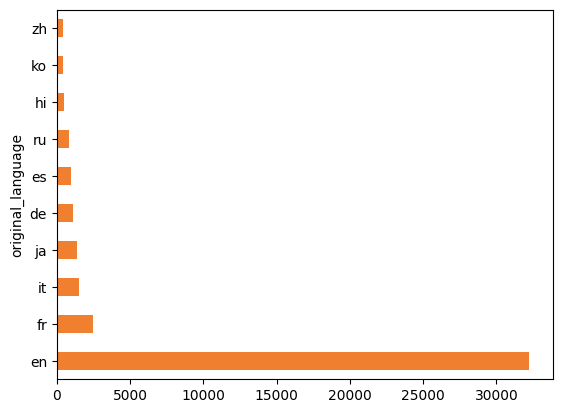

In [41]:
conteo = df_join["original_language"].value_counts()
conteo = conteo[:10]
conteo.plot(kind = "barh",  color='#F08030')

        Para la programación de la funcion peliculas por pais se realizo el siguiente grafico para observar los diez primeros paises con más cantidad de peliculas

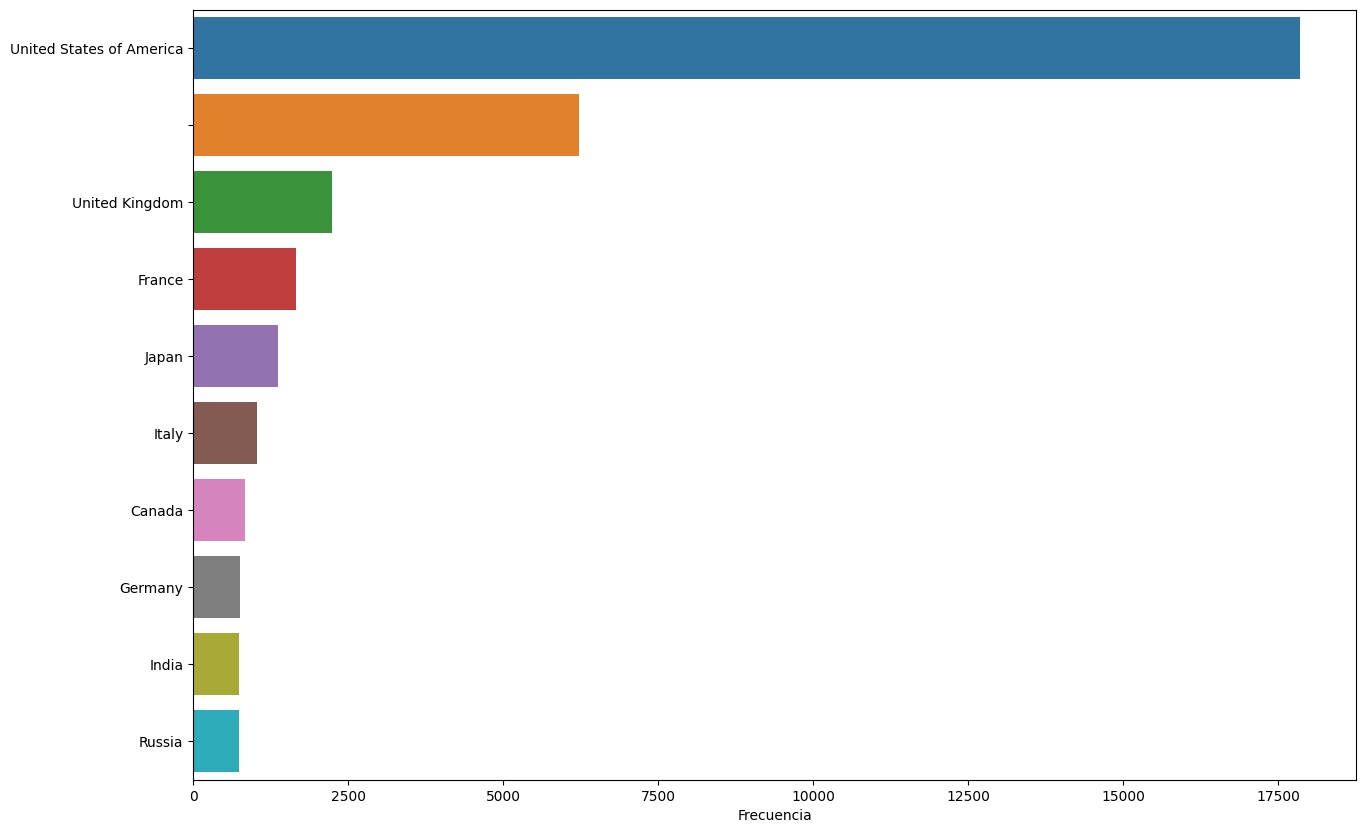

In [42]:
y=df_join.groupby("countries")['countries'].count().nlargest(30)
y = y[:10]
x = y.index 
 
plt.figure(figsize=(15,10)) 
ax = sns.barplot(x= y, y = x) 
ax.set_xlabel(xlabel = 'Frecuencia', fontsize = 10) 
ax.set_ylabel(ylabel = '', fontsize = 20) 

plt.show()